# Plots for the Report and Paper

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib
plt.style.use('seaborn-dark-palette')
#sns.set_theme(font='serif')
sns.set_style('whitegrid')
matplotlib.rc("font", family="DeJaVu Serif")

## Mobile OS Market Share

In [3]:
share = pd.read_csv(
    "https://gs.statcounter.com/os-market-share/mobile/chart.php?device=Mobile&device_hidden=mobile&statType_hidden=os_combined&region_hidden=ww&granularity=monthly&statType=Operating%20System&region=Worldwide&fromInt=201208&toInt=202102&fromMonthYear=2012-08&toMonthYear=2021-02&csv=1",
    parse_dates=['Date'],  
    date_parser=lambda x: datetime.strptime(x, '%Y-%m')
).set_index('Date')
share = share[['Android', 'iOS']]
share

,Android,iOS
Date,,
2012-08-01,28.21,24.48
2012-09-01,29.25,23.63
2012-10-01,30.19,23.72
2012-11-01,31.67,23.73
2012-12-01,33.19,23.26
...,...,...
2020-10-01,72.92,26.53
2020-11-01,71.18,28.19
2020-12-01,72.48,26.91


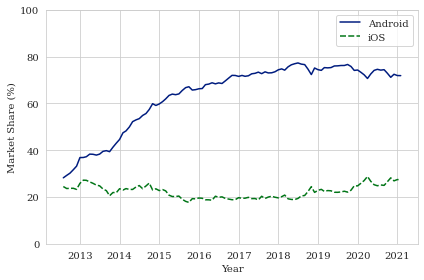

In [4]:
sns.lineplot(data=share).set(ylabel='Market Share (%)', xlabel='Year', ylim=[0,100]);
plt.tight_layout()
plt.savefig('mobile_os_share.pdf', dpi=300, bbox_inches='tight')

## Smart Devices Market Share

In [5]:
share = pd.read_csv(
    "https://gs.statcounter.com/platform-market-share/desktop-mobile-tablet/worldwide/chart.php?device=Desktop%20%26%20Mobile%20%26%20Tablet&device_hidden=desktop%2Bmobile%2Btablet&multi-device=true&statType_hidden=comparison&region_hidden=ww&granularity=monthly&statType=Platform%20Comparison&region=Worldwide&fromInt=201208&toInt=202102&fromMonthYear=2012-08&toMonthYear=2021-02&csv=1",
    parse_dates=['Date'],  
    date_parser=lambda x: datetime.strptime(x, '%Y-%m')
).set_index('Date')
share

,Desktop,Mobile,Tablet
Date,,,
2012-08-01,85.69,11.44,2.86
2012-09-01,85.33,11.66,3.01
2012-10-01,85.02,11.92,3.06
2012-11-01,84.13,12.66,3.22
2012-12-01,82.42,14.04,3.54
...,...,...,...
2020-10-01,48.88,48.62,2.50
2020-11-01,44.22,52.95,2.83
2020-12-01,41.46,55.73,2.81


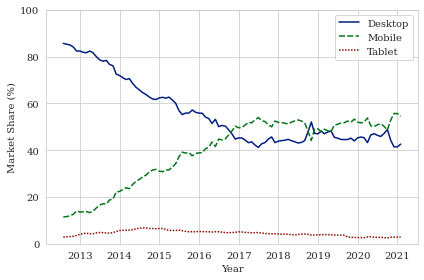

In [6]:
sns.lineplot(data=share).set(ylabel='Market Share (%)', xlabel='Year', ylim=[0,100]);
plt.tight_layout()
plt.savefig('device_share.pdf', dpi=300, bbox_inches='tight')

## Comparision of Accuracies

In [9]:
import wandb

In [10]:
api = wandb.Api()

In [11]:
runs = api.runs("vinayakakv/malware_homo_testing")

In [13]:
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # run.config is the input metrics.  We remove special values that start with _.
    config_list.append({k:v for k,v in run.config.items() if not k.startswith('_')}) 

    # run.name is the name of the run.
    name_list.append(run.name)       

import pandas as pd 
summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

In [14]:
all_df

,name,features,input_dimension,convolution_count,convolution_algorithm,test_type,test_recall,ROC,test_f1,test_loss,_runtime,_timestamp,test_accuracy,test_precision,test_confusion_matrix,PRC,_step,epoch
0,honest-lion-40,hybrid,247,0,GraphConv,best,0.731320,{'path': 'media/plotly/ROC_0_30eb7ab1.plotly.j...,0.767626,0.483147,10,1613321899,0.779668,0.807726,"{'size': 33568, '_type': 'image-file', 'width'...",{'path': 'media/plotly/PRC_0_da631dd0.plotly.j...,0,0
1,dandy-cherry-39,method,5,0,GraphConv,best,0.600954,"{'size': 87317, '_type': 'plotly-file', 'sha25...",0.642857,0.591101,6,1613321885,0.667722,0.691042,"{'width': 640, 'format': 'png', 'height': 480,...",{'path': 'media/plotly/PRC_0_9068b746.plotly.j...,0,0
2,autumn-bird-38,degree,1,0,GraphConv,best,0.596184,{'path': 'media/plotly/ROC_0_47772c0d.plotly.j...,0.625261,0.652178,12,1613321873,0.644383,0.657318,"{'height': 480, 'sha256': 'f98e3fc6d4e33253efd...",{'path': 'media/plotly/PRC_0_decb1bef.plotly.j...,0,0
3,firm-violet-37,hybrid,247,3,DotGatConv,best,0.895072,{'path': 'media/plotly/ROC_0_b8b3a0fb.plotly.j...,0.901160,0.311922,12,1613321824,0.902294,0.907333,"{'width': 640, 'format': 'png', 'height': 480,...","{'_type': 'plotly-file', 'sha256': 'd0202273e1...",0,0
4,iconic-fog-36,method,5,3,DotGatConv,best,0.375199,"{'size': 88589, '_type': 'plotly-file', 'sha25...",0.478702,0.670026,7,1613321808,0.593354,0.661064,"{'_type': 'image-file', 'width': 640, 'format'...",{'sha256': '1b12d30f369c66a01efbf6773bef0109d8...,0,0
5,drawn-forest-35,degree,1,3,DotGatConv,best,0.414149,{'path': 'media/plotly/ROC_0_abfbd629.plotly.j...,0.500000,0.661118,8,1613321797,0.587816,0.630751,"{'height': 480, 'sha256': '2961d795f7e1b4c2d92...",{'path': 'media/plotly/PRC_0_ce96b71c.plotly.j...,0,0
6,devoted-wave-34,hybrid,247,2,DotGatConv,best,0.897456,{'path': 'media/plotly/ROC_0_035bc987.plotly.j...,0.899602,0.295598,11,1613321785,0.900316,0.901757,{'sha256': '2d9e1c4e9e39d85c23aa8cf4fe475297df...,{'path': 'media/plotly/PRC_0_6c43fd53.plotly.j...,0,0
7,cosmic-water-33,method,5,2,DotGatConv,best,0.399046,"{'size': 89990, '_type': 'plotly-file', 'sha25...",0.506815,0.663883,7,1613321770,0.613528,0.694329,"{'height': 480, 'sha256': 'b9ca923d214afd941b6...",{'path': 'media/plotly/PRC_0_96be0b95.plotly.j...,0,0
8,mild-flower-32,degree,1,2,DotGatConv,best,0.453895,{'path': 'media/plotly/ROC_0_4b6ffda7.plotly.j...,0.529194,0.661981,8,1613321757,0.598101,0.634444,{'path': 'media/images/test_confusion_matrix_0...,"{'_type': 'plotly-file', 'sha256': '8a5fb835f4...",0,0
9,noble-sunset-31,hybrid,247,1,DotGatConv,best,0.903021,{'path': 'media/plotly/ROC_0_9fcda238.plotly.j...,0.897669,0.303778,11,1613321743,0.897547,0.892380,{'path': 'media/images/test_confusion_matrix_0...,"{'_type': 'plotly-file', 'sha256': '5788e302ba...",0,0


In [15]:
sns.set(font_scale=2, style='ticks')
matplotlib.rc("font", family="DeJaVu Serif")

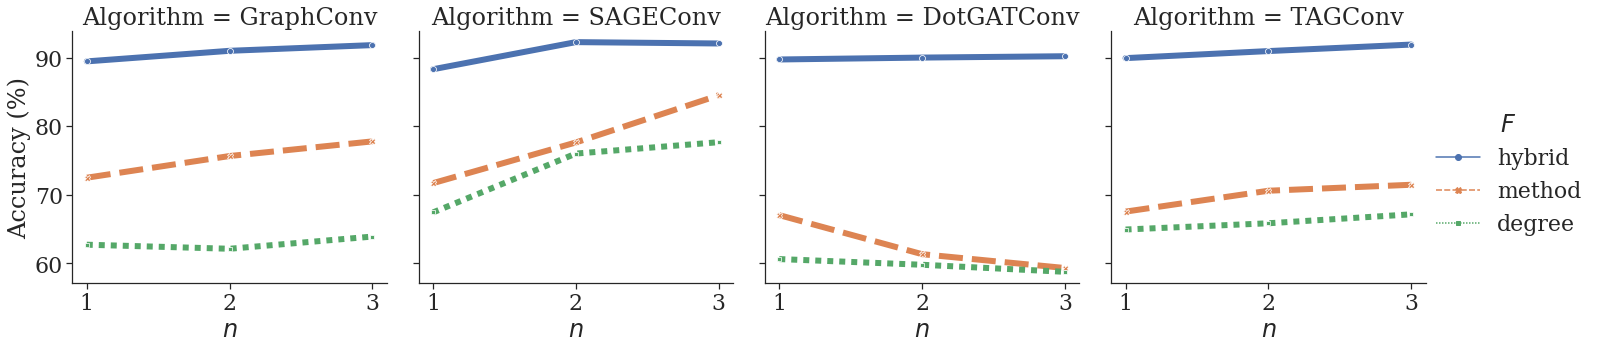

In [48]:
results = pd.DataFrame(all_df[['features', 'convolution_count', 'convolution_algorithm', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']])
results.columns = ['$F$', 'n', 'Algorithm', 'Accuracy (%)', 'Precision', 'Recall', 'F1-Score']
results['Accuracy (%)'] *= 100
results.loc[results['Algorithm']=='DotGatConv', ['Algorithm']] = 'DotGATConv'
g = sns.relplot(
    data=results.query('n!=0'),
    x='n',
    y="Accuracy (%)",
    hue='$F$',
    style='$F$',
    col='Algorithm',
    kind='line',
    markers=True,
    dashes=True,
    linewidth=6,
    col_order=['GraphConv', 'SAGEConv', 'DotGATConv', 'TAGConv'],
).set(
    xticks=[1,2,3],
    xlabel='$n$'
)
#plt.tight_layout()
plt.savefig('acc_plot.pdf')

## Dataset Balancing steps

In [3]:
import joblib as J
import dgl
from pathlib import Path
import numpy as np

Using backend: pytorch


In [4]:
def cut_plot_histogram(
        x,
        hue,
        data,
        bins,
        hue_order,
        top_limit,
        bottom_limit,
        xlabel,
        ylabel,
        file_name
):
    f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
    sns.histplot(x=x, hue=hue, data=data, bins=bins, ax=ax, multiple='dodge', hue_order=hue_order)
    sns.histplot(x=x, hue=hue, data=data, bins=bins, ax=ax2, multiple='dodge', hue_order=hue_order)
    ax.set_ylim(*top_limit)
    ax2.set_ylim(*bottom_limit)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()
    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
    # ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    # ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    ax.xaxis.set_visible(False)
    ax2.get_legend().remove()
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

In [49]:
sns.set(font_scale=1.1, style='ticks')

### MalDroid APK Size distribution

In [50]:
def process(file):
    return {
        "file_name": str(file),
        "file_size": file.stat().st_size,
        "label": "Benign" if "Ben" in str(file) else "Malware"
    }

In [51]:
maldroid_path = Path("/home2/vinayak/datasets/MalDroid2020/raw/")
androzoo_path = Path("/home2/vinayak/datasets/ZooDroid/raw/")

In [52]:
maldroid_sizes = J.Parallel(n_jobs=40)(J.delayed(process)(x) for x in maldroid_path.iterdir())

In [53]:
androzoo_sizes = J.Parallel(n_jobs=40)(J.delayed(process)(x) for x in androzoo_path.iterdir())

In [54]:
maldroid_sizes = pd.DataFrame.from_records(maldroid_sizes)
androzoo_sizes = pd.DataFrame.from_records(androzoo_sizes)
total_sizes = pd.concat([maldroid_sizes, androzoo_sizes])

In [55]:
bins = np.arange(0, np.max(total_sizes['file_size']), 0.5e7) # 5MB Bins

<AxesSubplot:xlabel='file_size', ylabel='Count'>

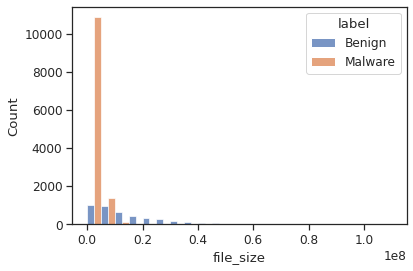

In [56]:
sns.histplot(
    x='file_size',
    hue='label',
    data=maldroid_sizes,
    bins=bins,
    multiple='dodge',
    hue_order=['Benign', 'Malware']
)

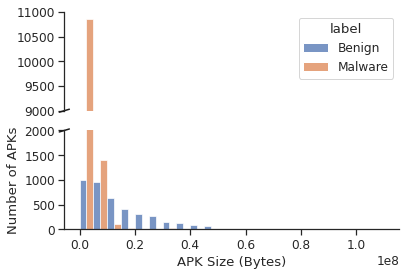

In [57]:
cut_plot_histogram(
    x='file_size',
    hue='label',
    data=maldroid_sizes,
    bins=bins,
    hue_order=['Benign', 'Malware'],
    top_limit=(9000, 11000),
    bottom_limit=(0, 2000),
    xlabel='APK Size (Bytes)',
    ylabel='Number of APKs',
    file_name='initial_apk_sizes.pdf'
)

<AxesSubplot:xlabel='file_size', ylabel='Count'>

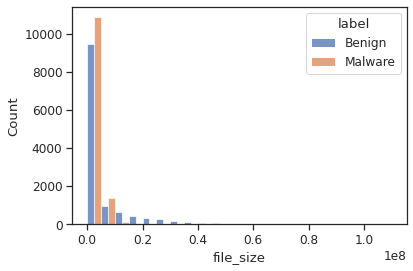

In [58]:
sns.histplot(
    x='file_size',
    hue='label',
    data=total_sizes,
    bins=bins,
    multiple='dodge',
    hue_order=['Benign', 'Malware']
)

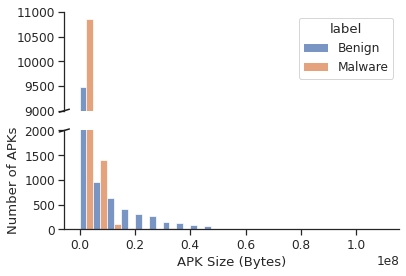

In [59]:
cut_plot_histogram(
    x='file_size',
    hue='label',
    data=total_sizes,
    bins=bins,
    hue_order=['Benign', 'Malware'],
    top_limit=(9000, 11000),
    bottom_limit=(0, 2000),
    xlabel='APK Size (Bytes)',
    ylabel='Number of APKs',
    file_name='final_apk_sizes.pdf'
)

### Initial Number of Nodes distribution

In [60]:
def process(file):
    graphs, labels = dgl.load_graphs(str(file))
    graph = graphs[0]
    return {
        "num_nodes": graph.num_nodes(),
        "file_name": file,
        "label": "Benign" if "Ben" in str(file) else "Malware"
    }

In [61]:
maldroid_path = Path("/home2/vinayak/Homo")
androzoo_path = Path("/home2/vinayak/Homo1")

In [62]:
maldroid_sizes = J.Parallel(n_jobs=40)(J.delayed(process)(x) for x in maldroid_path.iterdir())

In [63]:
androzoo_sizes = J.Parallel(n_jobs=40)(J.delayed(process)(x) for x in androzoo_path.iterdir())

In [64]:
maldroid_sizes = pd.DataFrame.from_records(maldroid_sizes)
androzoo_sizes = pd.DataFrame.from_records(androzoo_sizes)
total_sizes = pd.concat([maldroid_sizes, androzoo_sizes])

In [65]:
q1 = total_sizes['num_nodes'].quantile(0.25)
q3 = total_sizes['num_nodes'].quantile(0.75)
iqr = q3 - q1

In [66]:
filtered_sizes = total_sizes.query("@q1 - 1.5*@iqr  < num_nodes < @q3 + 1.5*@iqr ")

In [67]:
len(total_sizes), len(filtered_sizes)

(24518, 20911)

In [68]:
bins = np.arange(0, np.max(filtered_sizes['num_nodes']), 500)

<AxesSubplot:xlabel='num_nodes', ylabel='Count'>

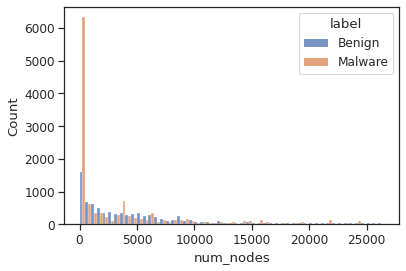

In [69]:
sns.histplot(
    x='num_nodes',
    hue='label',
    data=filtered_sizes,
    bins=bins,
    multiple='dodge',
    hue_order=['Benign', 'Malware']
)

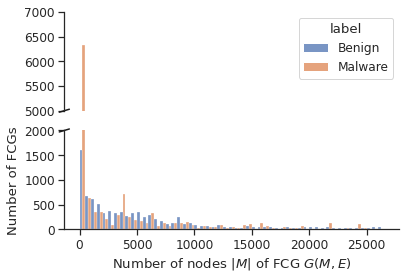

In [70]:
cut_plot_histogram(
    x='num_nodes',
    hue='label',
    data=filtered_sizes,
    bins=bins,
    hue_order=['Benign', 'Malware'],
    top_limit=(5000, 7000),
    bottom_limit=(0, 2000),
    xlabel='Number of nodes $|M|$ of FCG $G(M,E)$',
    ylabel='Number of FCGs',
    file_name='fcg_imbal.pdf'
)

## Balanced Number of nodes distribution

In [71]:
train_path = Path("/home2/vinayak/homo_train")
test_path = Path("/home2/vinayak/homo_test")

In [72]:
train_sizes = J.Parallel(n_jobs=40)(J.delayed(process)(x) for x in train_path.iterdir())

In [73]:
test_sizes = J.Parallel(n_jobs=40)(J.delayed(process)(x) for x in test_path.iterdir())

In [74]:
train_sizes = pd.DataFrame.from_records(train_sizes)
test_sizes = pd.DataFrame.from_records(test_sizes)
total_sizes = pd.concat([train_sizes, test_sizes])

In [75]:
bins = np.arange(0, np.max(total_sizes['num_nodes']), 500)

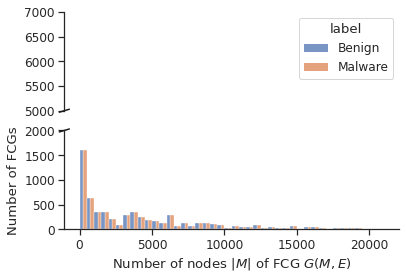

In [76]:
cut_plot_histogram(
    x='num_nodes',
    hue='label',
    data=total_sizes,
    bins=bins,
    hue_order=['Benign', 'Malware'],
    top_limit=(5000, 7000),
    bottom_limit=(0, 2000),
    xlabel='Number of nodes $|M|$ of FCG $G(M,E)$',
    ylabel='Number of FCGs',
    file_name='fcg_bal.pdf'
)